## Notebook 01 - Clase de Regresión Lineal

## Caso puramente lineal

Llamo la librería de álgebra lineal, generación de números aleatorios y gráficos (visualización)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0) #reproducibilidad: fijo una semilla de números aleatorios para obtener siempre los mismos resultados

Creo $N$ puntos aleatorios

In [2]:
N = 50 #número de puntos
x = np.random.rand(N)

Supongamos que conocemos $\theta_0$ y $\theta_1$

In [3]:
theta_0 = 1.3
theta_1 = 2.5

Creamos un modelo de referencia donde agregamos ruido a los puntos generados aleatoriamente: 

In [4]:
y = theta_1*x + theta_0 + 0.2*np.random.randn(N)

Construimos el problema matricial tal y cómo lo vimos en clases.
Para poder resolver este problema, utiliza el comando help sobre la función 
```np.linalg.lstsq```

In [5]:
help(np.linalg.lstsq)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Computes the vector `x` that approximately solves the equation
    ``a @ x = b``. The equation may be under-, well-, or over-determined
    (i.e., the number of linearly independent rows of `a` can be less than,
    equal to, or greater than its number of linearly independent columns).
    If `a` is square and of full rank, then `x` (but for round-off error)
    is the "exact" solution of the equation. Else, `x` minimizes the
    Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
    solutions, the one with the smallest 2-norm :math:`||x||` is returned.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of

Por lo tanto necesitamos la primera salida, que corresponde a la solución del problema

Primero construye la matriz $X$

In [6]:
X = np.column_stack((x,np.ones((N,1))))

Luego, resuelve le problema para $\mathbf{y}$ y $X$ utilizando ```np.linalg.lstsq```

In [7]:
theta_hat = np.linalg.lstsq(X,y,rcond=None)[0] #resuelve la ecuación normal

In [8]:
theta_hat

array([2.47112206, 1.29825197])

In [9]:
theta_hat[0]

2.4711220615569176

In [15]:
theta_hat[1]

1.7935053588900067

Interpola utilizando los $\hat{\theta_0}$ y $\hat{\theta_1}$ que son las soluciones aproximadas via regresión lineal. Compara ambos gráficos. 

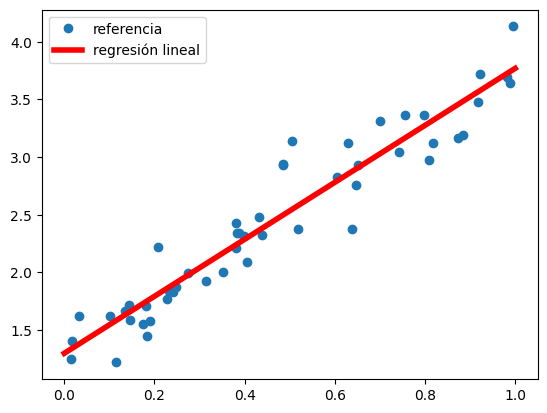

In [10]:
t = np.linspace(0,1,200)
yhat = theta_hat[0]*t + theta_hat[1]

plt.plot(x,y,'o')
plt.plot(t,yhat,'r',linewidth=4)
plt.legend(['referencia','regresión lineal'])

## Caso Cuadrático

Intenta resolver a través del mismo procedimiento anterior el caso cuadrático

In [11]:
theta_0 = 1.2
theta_1 = 1.3
theta_2 = -2.5

y = theta_2*x**2 + theta_1*x + theta_0 + 0.2*np.random.randn(N)

Creación de $X$

In [12]:
X = np.column_stack((x**2,x,np.ones((N,1))))

Solucionando el problema

In [13]:
theta_hat = np.linalg.lstsq(X,y,rcond=None)[0] 

Graficando los resultados

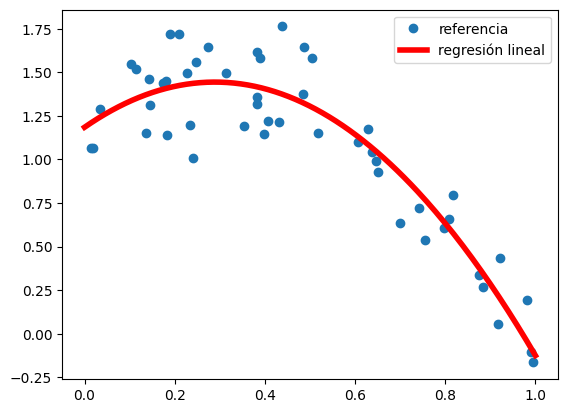

In [14]:
t = np.linspace(0,1,200)
yhat = theta_hat[0]*t**2 + theta_hat[1]*t + theta_hat[2]

plt.plot(x,y,'o')
plt.plot(t,yhat,'r',linewidth=4)
plt.legend(['referencia','regresión lineal'])